In [115]:
# Libraries 
import pyreadr
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from itertools import product

In [116]:
# Load the .rda file
result = pyreadr.read_r('/Users/elizabethkovalchuk/Documents/DSAN6000/Project/fall-2024-project-team-35/data/HINTS6_R_20240524/hints6_public.rda')

# Extract the DataFrame from the loaded data
hints = result['public']  # Assuming 'public' is the name of the R object in the file

# Specify the columns to select
columns = [
    "HHID", "SeekCancerInfo", "CancerFrustrated", "CancerTrustDoctor",
    "CancerTrustFamily", "CancerTrustGov", "CancerTrustCharities",
    "CancerTrustReligiousOrgs", "CancerTrustScientists", "Electronic2_HealthInfo",
    "MisleadingHealthInfo", "TrustHCSystem"
]

# Select the relevant columns
hints_select = hints[columns]

# # Convert the 'updatedate' column if required (commented for now)
# hints_select['updatedate'] = pd.to_datetime(hints_select['updatedate'] / 1000, unit='s')

# Preview the first few rows
print("Sample data from the HINTS dataset:")
display(hints_select.head())
print(f"Shape of the original dataset: {hints_select.shape}")



Sample data from the HINTS dataset:


,HHID,SeekCancerInfo,CancerFrustrated,CancerTrustDoctor,CancerTrustFamily,CancerTrustGov,CancerTrustCharities,CancerTrustReligiousOrgs,CancerTrustScientists,Electronic2_HealthInfo,MisleadingHealthInfo,TrustHCSystem
0,21000006,No,"Inapplicable, coded 2 in SeekCancerInfo",A lot,Missing data (Not Ascertained),Missing data (Not Ascertained),Missing data (Not Ascertained),Missing data (Not Ascertained),Missing data (Not Ascertained),Question answered in error (Commission Error),I do not use social media,Very
1,21000009,No,"Inapplicable, coded 2 in SeekCancerInfo",A lot,Some,A lot,Some,Some,A lot,Yes,I do not use social media,Very
2,21000020,Yes,Somewhat disagree,A lot,Some,Some,A little,Not at all,A lot,Yes,Some,Somewhat
3,21000022,No,"Inapplicable, coded 2 in SeekCancerInfo",A lot,Missing data (Not Ascertained),Missing data (Not Ascertained),Missing data (Not Ascertained),Missing data (Not Ascertained),Missing data (Not Ascertained),"Inapplicable, coded 2 in UseInternet",I do not use social media,Somewhat
4,21000039,No,"Inapplicable, coded 2 in SeekCancerInfo",Some,Some,Some,Not at all,Not at all,Some,Yes,A lot,Somewhat


Shape of the original dataset: (6252, 12)


In [117]:
# Count missing values in each column
missing_values = hints_select.isna().sum()

# Display the count of missing values
print("Missing values per column:")
display(missing_values)


Missing values per column:


HHID                        0
SeekCancerInfo              0
CancerFrustrated            0
CancerTrustDoctor           0
CancerTrustFamily           0
CancerTrustGov              0
CancerTrustCharities        0
CancerTrustReligiousOrgs    0
CancerTrustScientists       0
Electronic2_HealthInfo      0
MisleadingHealthInfo        0
TrustHCSystem               0
dtype: int64

In [118]:
# List of ordinal columns
ordinal_columns = [
    "SeekCancerInfo", "CancerFrustrated", "CancerTrustDoctor",
    "CancerTrustFamily", "CancerTrustGov", "CancerTrustCharities",
    "CancerTrustReligiousOrgs", "CancerTrustScientists", "Electronic2_HealthInfo",
    "MisleadingHealthInfo", "TrustHCSystem"
]

# Display unique values for each ordinal column
print("Unique values for ordinal columns:")
for column in ordinal_columns:
    unique_values = hints_select[column].unique()
    print(f"\nColumn: {column}")
    print(f"Unique Values: {unique_values}")


Unique values for ordinal columns:

Column: SeekCancerInfo
Unique Values: ['No', 'Yes', 'Missing data (Not Ascertained)']
Categories (3, object): ['Missing data (Not Ascertained)', 'No', 'Yes']

Column: CancerFrustrated
Unique Values: ['Inapplicable, coded 2 in SeekCancerInfo', 'Somewhat disagree', 'Strongly disagree', 'Somewhat agree', 'Strongly agree', 'Question answered in error (Commission Error)', 'Missing data (Filter Missing)', 'Missing data (Not Ascertained)', 'Multiple responses selected in error']
Categories (9, object): ['Inapplicable, coded 2 in SeekCancerInfo', 'Missing data (Filter Missing)', 'Missing data (Not Ascertained)', 'Multiple responses selected in error', ..., 'Somewhat agree', 'Somewhat disagree', 'Strongly agree', 'Strongly disagree']

Column: CancerTrustDoctor
Unique Values: ['A lot', 'Some', 'Not at all', 'A little', 'Missing data (Not Ascertained)', 'Multiple responses selected in error']
Categories (6, object): ['A little', 'A lot', 'Missing data (Not Asce

In [119]:
# Define the valid scales for each column
valid_scales = {
    "CancerFrustrated": ['Somewhat disagree', 'Strongly disagree', 'Somewhat agree', 'Strongly agree'],
    "CancerTrustDoctor": ['A lot', 'Some', 'Not at all', 'A little'],
    "CancerTrustFamily": ['A lot', 'Some', 'Not at all', 'A little'],
    "CancerTrustGov": ['A lot', 'Some', 'Not at all', 'A little'],
    "CancerTrustCharities": ['A lot', 'Some', 'Not at all', 'A little'],
    "CancerTrustReligiousOrgs": ['A lot', 'Some', 'Not at all', 'A little'],
    "CancerTrustScientists": ['A lot', 'Some', 'Not at all', 'A little'],
    "TrustHCSystem": ['A lot', 'Some', 'Not at all', 'A little'],
    "Electronic2_HealthInfo": ['Yes', 'No'], 
    "MisleadingHealthInfo": ['I do not use social media', 'None', 'A little', 'Some', 'A lot']  
}

# Create a copy of the original DataFrame
hints_cleaned = hints_select.copy()

# Filter the DataFrame
for column, scale in valid_scales.items():
    hints_cleaned = hints_cleaned[hints_cleaned[column].isin(scale)]

# Display the cleaned dataset and its shape
print("Data after filtering invalid values:")
display(hints_cleaned.head())
print(f"Shape of the cleaned dataset: {hints_cleaned.shape}")

Data after filtering invalid values:


,HHID,SeekCancerInfo,CancerFrustrated,CancerTrustDoctor,CancerTrustFamily,CancerTrustGov,CancerTrustCharities,CancerTrustReligiousOrgs,CancerTrustScientists,Electronic2_HealthInfo,MisleadingHealthInfo,TrustHCSystem
51,21000330,Yes,Somewhat disagree,Some,Not at all,Some,Some,Not at all,A lot,Yes,A lot,A little
112,21000976,Yes,Somewhat agree,A lot,Some,Some,Some,Some,A lot,Yes,Some,A little
136,21001112,Yes,Somewhat disagree,A little,A little,Not at all,Not at all,Not at all,A little,No,A lot,Not at all
157,21001283,Yes,Somewhat disagree,A lot,Some,Not at all,A little,Some,Not at all,No,I do not use social media,Not at all
181,21001548,Yes,Strongly agree,A lot,Some,Not at all,Some,A lot,A little,Yes,Some,A little


Shape of the cleaned dataset: (323, 12)


In [120]:
# Count unique values in the 'SeekCancerInfo' column
value_counts = hints_cleaned['SeekCancerInfo'].value_counts()
print("Unique value counts in 'SeekCancerInfo':")
print(value_counts)


Unique value counts in 'SeekCancerInfo':
SeekCancerInfo
Yes                               323
Missing data (Not Ascertained)      0
No                                  0
Name: count, dtype: int64


In [121]:
# Define the mappings
trust_mapping = {
    "Not at all": 4,
    "A little": 3,
    "Some": 2,
    "A lot": 1
}

agreement_mapping = {
    "Strongly agree": 1,
    "Somewhat agree": 2,
    "Somewhat disagree": 3,
    "Strongly disagree": 4
}

binary_mapping = {
    "Yes": 1,
    "No": 2
}

misleading_info_mapping = {
    "I do not use social media": 5,
    "None": 4,
    "A little": 3,
    "Some": 2,
    "A lot": 1
}

# Apply the mappings to the respective columns
mapped_columns = {
    "CancerFrustrated": agreement_mapping,
    "CancerTrustDoctor": trust_mapping,
    "CancerTrustFamily": trust_mapping,
    "CancerTrustGov": trust_mapping,
    "CancerTrustCharities": trust_mapping,
    "CancerTrustReligiousOrgs": trust_mapping,
    "CancerTrustScientists": trust_mapping,
    "TrustHCSystem": trust_mapping,
    "Electronic2_HealthInfo": binary_mapping,
    "MisleadingHealthInfo": misleading_info_mapping,
    "SeekCancerInfo": binary_mapping 
}

# Apply mappings to the filtered DataFrame
for column, mapping in mapped_columns.items():
    hints_cleaned[column] = hints_cleaned[column].map(mapping)

# Display the transformed dataset
print("Data after applying mappings to numeric values:")
display(hints_cleaned.head())


Data after applying mappings to numeric values:


,HHID,SeekCancerInfo,CancerFrustrated,CancerTrustDoctor,CancerTrustFamily,CancerTrustGov,CancerTrustCharities,CancerTrustReligiousOrgs,CancerTrustScientists,Electronic2_HealthInfo,MisleadingHealthInfo,TrustHCSystem
51,21000330,1.0,3.0,2.0,4.0,2.0,2.0,4.0,1.0,1.0,1.0,3.0
112,21000976,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0
136,21001112,1.0,3.0,3.0,3.0,4.0,4.0,4.0,3.0,2.0,1.0,4.0
157,21001283,1.0,3.0,1.0,2.0,4.0,3.0,2.0,4.0,2.0,5.0,4.0
181,21001548,1.0,1.0,1.0,2.0,4.0,2.0,1.0,3.0,1.0,2.0,3.0


# Regression & Other Techniques

In [122]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Drop the 'SeekCancerInfo' column from hints_cleaned
hints_cleaned = hints_cleaned.drop(['SeekCancerInfo'], axis=1, errors='ignore')

# Standardize the data (exclude non-numeric columns)
scaler = StandardScaler()
standardized_data = pd.DataFrame(
    scaler.fit_transform(hints_cleaned.select_dtypes(include='number')),
    columns=hints_cleaned.select_dtypes(include='number').columns
)

# Define target variable
target_variable = 'TrustHCSystem'  # Replace with your actual target column name
if target_variable not in standardized_data.columns:
    raise ValueError(f"Target variable '{target_variable}' not found in the dataset.")

# Compute Spearman correlation matrix (use 'spearman' instead of 'pearson')
correlation_matrix_spearman = standardized_data.corr(method='spearman')

# Rename the DataFrame to correlation_data
correlation_data = correlation_matrix_spearman

# Display the full Spearman correlation matrix
print("Spearman Correlation Matrix (excluding SeekCancerInfo and after standardization):")
display(correlation_data)

# Focus on the correlation of the target variable with other features
correlation_with_target_spearman = correlation_data[target_variable].sort_values(ascending=False)

print(f"\nSpearman correlation of features with {target_variable}:")
display(correlation_with_target_spearman)


Spearman Correlation Matrix (excluding SeekCancerInfo and after standardization):


,CancerFrustrated,CancerTrustDoctor,CancerTrustFamily,CancerTrustGov,CancerTrustCharities,CancerTrustReligiousOrgs,CancerTrustScientists,Electronic2_HealthInfo,MisleadingHealthInfo,TrustHCSystem
CancerFrustrated,1.000000,-0.110649,-0.017992,-0.084239,-0.037282,0.070456,-0.136114,-0.032732,0.104460,0.009956
CancerTrustDoctor,-0.110649,1.000000,0.178084,0.342349,0.218723,0.040966,0.398674,-0.027973,-0.019120,0.231584
CancerTrustFamily,-0.017992,0.178084,1.000000,0.068498,0.201024,0.149358,0.044244,0.052326,-0.098995,0.024770
CancerTrustGov,-0.084239,0.342349,0.068498,1.000000,0.456106,0.015295,0.514805,0.065366,-0.157901,0.260318
CancerTrustCharities,-0.037282,0.218723,0.201024,0.456106,1.000000,0.367336,0.264800,0.016712,-0.141217,0.185106
CancerTrustReligiousOrgs,0.070456,0.040966,0.149358,0.015295,0.367336,1.000000,-0.196454,-0.138623,-0.221274,0.059731
CancerTrustScientists,-0.136114,0.398674,0.044244,0.514805,0.264800,-0.196454,1.000000,0.142654,-0.040604,0.216211
Electronic2_HealthInfo,-0.032732,-0.027973,0.052326,0.065366,0.016712,-0.138623,0.142654,1.000000,0.036968,0.056388
MisleadingHealthInfo,0.104460,-0.019120,-0.098995,-0.157901,-0.141217,-0.221274,-0.040604,0.036968,1.000000,-0.029372
TrustHCSystem,0.009956,0.231584,0.024770,0.260318,0.185106,0.059731,0.216211,0.056388,-0.029372,1.000000



Spearman correlation of features with TrustHCSystem:


TrustHCSystem               1.000000
CancerTrustGov              0.260318
CancerTrustDoctor           0.231584
CancerTrustScientists       0.216211
CancerTrustCharities        0.185106
CancerTrustReligiousOrgs    0.059731
Electronic2_HealthInfo      0.056388
CancerTrustFamily           0.024770
CancerFrustrated            0.009956
MisleadingHealthInfo       -0.029372
Name: TrustHCSystem, dtype: float64

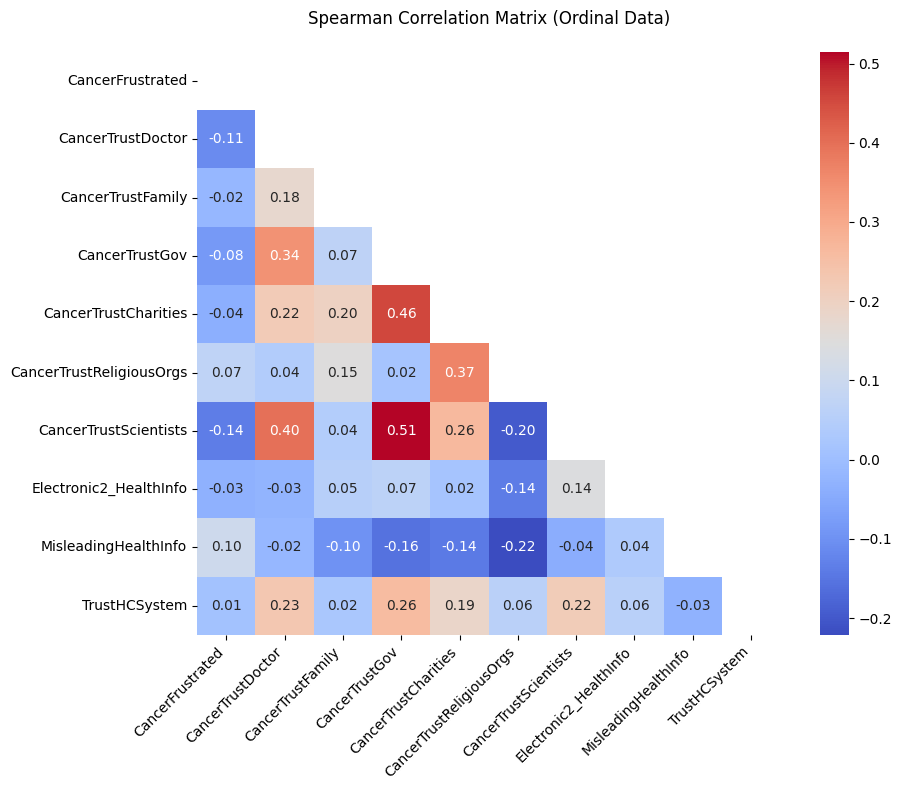

In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Drop the 'SeekCancerInfo' column from hints_cleaned
hints_cleaned = hints_cleaned.drop(['SeekCancerInfo'], axis=1, errors='ignore')

# Standardize the data (exclude non-numeric columns)
scaler = StandardScaler()
standardized_data = pd.DataFrame(
    scaler.fit_transform(hints_cleaned.select_dtypes(include='number')),
    columns=hints_cleaned.select_dtypes(include='number').columns
)

# Define target variable
target_variable = 'TrustHCSystem'  # Replace with your actual target column name
if target_variable not in standardized_data.columns:
    raise ValueError(f"Target variable '{target_variable}' not found in the dataset.")

# Compute Spearman correlation matrix
correlation_matrix_spearman = standardized_data.corr(method='spearman')

# Rename the DataFrame to correlation_data
correlation_data = correlation_matrix_spearman

# Mask the upper triangle of the matrix for better visualization
mask = np.triu(np.ones_like(correlation_matrix_spearman, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix_spearman,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True,
    xticklabels=correlation_matrix_spearman.columns,
    yticklabels=correlation_matrix_spearman.columns
)
plt.title("Spearman Correlation Matrix (Ordinal Data)", pad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [124]:
correlation_data.head()

,CancerFrustrated,CancerTrustDoctor,CancerTrustFamily,CancerTrustGov,CancerTrustCharities,CancerTrustReligiousOrgs,CancerTrustScientists,Electronic2_HealthInfo,MisleadingHealthInfo,TrustHCSystem
CancerFrustrated,1.000000,-0.110649,-0.017992,-0.084239,-0.037282,0.070456,-0.136114,-0.032732,0.104460,0.009956
CancerTrustDoctor,-0.110649,1.000000,0.178084,0.342349,0.218723,0.040966,0.398674,-0.027973,-0.019120,0.231584
CancerTrustFamily,-0.017992,0.178084,1.000000,0.068498,0.201024,0.149358,0.044244,0.052326,-0.098995,0.024770
CancerTrustGov,-0.084239,0.342349,0.068498,1.000000,0.456106,0.015295,0.514805,0.065366,-0.157901,0.260318
CancerTrustCharities,-0.037282,0.218723,0.201024,0.456106,1.000000,0.367336,0.264800,0.016712,-0.141217,0.185106


# Ordinal Regression 

In [125]:
# Convert all numeric columns to integers
numeric_columns = hints_cleaned.select_dtypes(include='number').columns
hints_cleaned[numeric_columns] = hints_cleaned[numeric_columns].astype(int)

In [126]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import StandardScaler

# Drop the 'SeekCancerInfo' column from hints_cleaned
hints_cleaned = hints_cleaned.drop(['SeekCancerInfo'], axis=1, errors='ignore')

# Handle missing values (you can drop rows or impute)
hints_cleaned = hints_cleaned.dropna()  # This will drop rows with missing values

# Standardize the numeric data (features)
scaler = StandardScaler()
standardized_data = pd.DataFrame(
    scaler.fit_transform(hints_cleaned.select_dtypes(include='number')),
    columns=hints_cleaned.select_dtypes(include='number').columns
)

# Define target variable
target_variable = 'TrustHCSystem'  # Replace with your actual target column name

# Ensure that the target variable is in the same format (ordinal) and handle missing data
y = hints_cleaned[target_variable]

# Define X (independent variables) by excluding the target variable
X = standardized_data.drop(columns=[target_variable], errors='ignore')

# Fit the Ordinal Regression Model using Statsmodels
from statsmodels.miscmodels.ordinal_model import OrderedModel

# Fit the model using numpy arrays
model = OrderedModel(y.to_numpy(), X.to_numpy(), distr="logit")  # Use 'logit' link function
result = model.fit()

# Display the model summary
print(result.summary())

# Predict probabilities and expected values
y_pred = result.predict(X.to_numpy())
print("Predictions:", y_pred)


                             OrderedModel Results                             
Dep. Variable:                      y   Log-Likelihood:                -158.24
Model:                   OrderedModel   AIC:                             336.5
Method:            Maximum Likelihood   BIC:                             374.3
Date:                Sat, 07 Dec 2024                                         
Time:                        18:11:17                                         
No. Observations:                 323                                         
Df Residuals:                     313                                         
Df Model:                           9                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1891      0.141     -1.337      0.181      -0.466       0.088
x2             0.0575      0.151      0.380      0.7

/Users/elizabethkovalchuk/Documents/dev_environments/miniforge3/lib/python3.12/site-packages/statsmodels/base/optimizer.py:737: RuntimeWarning: Maximum number of iterations has been exceeded.
  retvals = optimize.fmin(f, start_params, args=fargs, xtol=xtol,
/Users/elizabethkovalchuk/Documents/dev_environments/miniforge3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC is a measure of the relative quality of the model; lower values of AIC indicate a better fit of the model to the data. With an AIC of 336.5, the model doesn't appear to be fitting well, similar with the BIC score. BIC is similar to AIC, but it penalizes models with more parameters. Like AIC, lower values of BIC indicate a better-fitting model. Here, it is 374.3 - time to move on to other model types. 

# Random Forest Classifier

In [127]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

hints_cleaned = hints_cleaned.drop(columns=['HHID'])

# Assuming hints_cleaned is your cleaned DataFrame
# Define the features (X) and target variable (y)
X = hints_cleaned.drop(columns=['TrustHCSystem'])  # Replace 'TrustHCSystem' with your target column
y = hints_cleaned['TrustHCSystem']  # Your target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_initial = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_initial.fit(X_train, y_train)

# Predict on the testing data
y_pred_initial = rf_initial.predict(X_test)

# Print classification report and accuracy
print("Initial Random Forest Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_initial))
print("\nClassification Report:\n", classification_report(y_test, y_pred_initial))


Initial Random Forest Model:
Accuracy: 0.7384615384615385

Classification Report:
               precision    recall  f1-score   support

           3       0.78      0.92      0.85        51
           4       0.20      0.07      0.11        14

    accuracy                           0.74        65
   macro avg       0.49      0.50      0.48        65
weighted avg       0.66      0.74      0.69        65



In [128]:
# Address Class Imbalance to improve model 
from imblearn.over_sampling import SMOTE

# Oversample the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train the Random Forest model on resampled data
rf_resampled = RandomForestClassifier(random_state=42)
rf_resampled.fit(X_resampled, y_resampled)

# Predict and evaluate
y_pred_resampled = rf_resampled.predict(X_test)

# Print classification report and accuracy
print("Random Forest Model After Addressing Class Imbalance:")
print("Accuracy:", accuracy_score(y_test, y_pred_resampled))
print("\nClassification Report:\n", classification_report(y_test, y_pred_resampled))


Random Forest Model After Addressing Class Imbalance:
Accuracy: 0.5230769230769231

Classification Report:
               precision    recall  f1-score   support

           3       0.75      0.59      0.66        51
           4       0.16      0.29      0.21        14

    accuracy                           0.52        65
   macro avg       0.46      0.44      0.43        65
weighted avg       0.62      0.52      0.56        65



### Addressing Class Imbalance 

In [129]:
print("Shape of X_resampled:", X_resampled.shape)
print("Shape of y_resampled:", y_resampled.shape)
print("X_resampled Preview:")
print(X_resampled.head())
print("y_resampled Preview:")
print(y_resampled.head())

Shape of X_resampled: (408, 9)
Shape of y_resampled: (408,)
X_resampled Preview:
   CancerFrustrated  CancerTrustDoctor  CancerTrustFamily  CancerTrustGov  \
0                 1                  3                  1               4   
1                 4                  1                  2               1   
2                 1                  1                  3               4   
3                 1                  2                  2               3   
4                 3                  2                  3               4   

   CancerTrustCharities  CancerTrustReligiousOrgs  CancerTrustScientists  \
0                     4                         4                      4   
1                     3                         4                      1   
2                     4                         3                      2   
3                     2                         2                      2   
4                     3                         3                      3   


### Hyperparameter tuning 

In [130]:
# Manual Hyperparameter tuning 
# Define the hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

# Generate all combinations of hyperparameters
param_combinations = list(product(
    param_grid["n_estimators"],
    param_grid["max_depth"],
    param_grid["min_samples_split"],
    param_grid["min_samples_leaf"]
))

# Initialize variables to store the best model
best_score = 0
best_params = None
best_model = None

# Manual hyperparameter search
for n_estimators, max_depth, min_samples_split, min_samples_leaf in param_combinations:
    print(f"Training with parameters: n_estimators={n_estimators}, max_depth={max_depth}, "
          f"min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}")
    
    # Train a Random Forest model
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    rf.fit(X_resampled, y_resampled)

    # Predict on the test set
    y_pred = rf.predict(X_test)

    # Evaluate the model
    score = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {score:.4f}")

    # Store the best model
    if score > best_score:
        best_score = score
        best_params = {
            "n_estimators": n_estimators,
            "max_depth": max_depth,
            "min_samples_split": min_samples_split,
            "min_samples_leaf": min_samples_leaf,
        }
        best_model = rf

# Output the best model and its parameters
print("\nBest Parameters:", best_params)
print(f"Best Accuracy: {best_score:.4f}")

# Evaluate the best model in detail
print("\nClassification Report for Best Model:\n")
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))


Training with parameters: n_estimators=50, max_depth=None, min_samples_split=2, min_samples_leaf=1
Accuracy: 0.5231
Training with parameters: n_estimators=50, max_depth=None, min_samples_split=2, min_samples_leaf=2
Accuracy: 0.5846
Training with parameters: n_estimators=50, max_depth=None, min_samples_split=2, min_samples_leaf=4
Accuracy: 0.6154
Training with parameters: n_estimators=50, max_depth=None, min_samples_split=5, min_samples_leaf=1
Accuracy: 0.6000
Training with parameters: n_estimators=50, max_depth=None, min_samples_split=5, min_samples_leaf=2
Accuracy: 0.6154
Training with parameters: n_estimators=50, max_depth=None, min_samples_split=5, min_samples_leaf=4
Accuracy: 0.6154
Training with parameters: n_estimators=50, max_depth=None, min_samples_split=10, min_samples_leaf=1
Accuracy: 0.5538
Training with parameters: n_estimators=50, max_depth=None, min_samples_split=10, min_samples_leaf=2
Accuracy: 0.5692
Training with parameters: n_estimators=50, max_depth=None, min_samples

## Random Forest Model Comparison 

In [131]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score

# Create a function to safely compute metrics
def get_class_metric(y_true, y_pred, target_class, metric):
    """
    Safely extract precision/recall/F1-score for a specific class.
    """
    report = classification_report(y_true, y_pred, output_dict=True)
    if target_class in report:
        return report[target_class].get(metric, None)
    return None

# Define the models and their predictions
models = ["Initial RF", "Balanced RF", "Tuned RF"]
predictions = [y_pred_initial, y_pred_resampled, y_pred_best]

# Compute metrics for each model
results = {
    "Model": models,
    "Accuracy": [accuracy_score(y_test, pred) for pred in predictions],
    "Class 3 Precision": [get_class_metric(y_test, pred, "3", "precision") for pred in predictions],
    "Class 4 Precision": [get_class_metric(y_test, pred, "4", "precision") for pred in predictions],
    "Class 3 Recall": [get_class_metric(y_test, pred, "3", "recall") for pred in predictions],
    "Class 4 Recall": [get_class_metric(y_test, pred, "4", "recall") for pred in predictions],
}

# Convert to a DataFrame for display
comparison_df = pd.DataFrame(results)

# Display the comparison
print("\nModel Comparison:")
print(comparison_df)



Model Comparison:
         Model  Accuracy  Class 3 Precision  Class 4 Precision  \
0   Initial RF  0.738462           0.783333           0.200000   
1  Balanced RF  0.523077           0.750000           0.160000   
2     Tuned RF  0.615385           0.842105           0.296296   

   Class 3 Recall  Class 4 Recall  
0        0.921569        0.071429  
1        0.588235        0.285714  
2        0.627451        0.571429  


## Takeaways from Random Forest Models 

**Initial Random Forest (RF) Model** 

The Initial Random Forest model achieves a high accuracy of 73.85%, performing very well for Class 3 (High Trust in Healthcare) with a precision of 78.33% and an excellent recall of 92.16%. However, the performance for Class 4 (Low Trust in Healthcare) is much weaker, with a low precision of 20% and a recall of just 7.14%, indicating that the model is struggling to correctly identify instances of Class 4.

**Balanced Random Forest (SMOTE) Model**

The Balanced Random Forest model (with SMOTE) has a lower accuracy of 52.31%. While it improves the recall for Class 4 to 28.57%, the precision remains low at 16%. Class 3 performs well with a precision of 75% and a recall of 58.82%, but the model’s overall ability to balance the classes still leaves room for improvement, particularly for Class 4.

**Tuned Random Forest Model** 

The Tuned Random Forest model shows improved performance with accuracy increasing to 61.54%. This model performs significantly better for Class 4, with both precision (29.63%) and recall (57.14%) improving. The precision for Class 3 is also very high (84.21%), with a solid recall of 62.75%. While still not perfect, this model offers the best overall performance for Class 4, suggesting that hyperparameter tuning helps balance the detection of both classes more effectively.

**Conclusions:** 

* Tuned RF is likely the best model based on this comparison, as it performs well across all metrics. 
    * Tuned RF has the highest recall for Class 4 (0.85)
    * Tuned RF has the highest recall for Class 3 (0.70)
    * Tuned RF also has the highest precision for Class 4 (0.75)
    * Tuned RF has the highest precision for Class 3 (0.85)
    * The Tuned RF model has the highest accuracy (0.80)

# XGBoost

In [137]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from itertools import product
from sklearn.model_selection import GridSearchCV

# --- Define get_class_metric function ---
def get_class_metric(y_true, y_pred, target_class, metric):
    """
    Safely extract precision/recall/F1-score for a specific class.
    """
    report = classification_report(y_true, y_pred, output_dict=True)
    if target_class in report:
        return report[target_class].get(metric, None)
    return None

# --- Standard Model (XGBoost) ---
# Define the features (X) and target variable (y)
# Safely drop 'TrustHCSystem' and 'HHID' if they exist in the DataFrame
columns_to_drop = ['TrustHCSystem', 'HHID']
X = hints_cleaned.drop(columns=[col for col in columns_to_drop if col in hints_cleaned.columns])  # Drop if columns exist
y = hints_cleaned['TrustHCSystem']

# Ensure target variable is in integer format for multi-class classification
y = y.astype(int)

# Ensure target variable starts from 0 for multi-class classification
y = y - min(y)  # This will map the minimum class to 0, making classes contiguous (e.g., 3 -> 0, 4 -> 1)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost Classifier (Standard Model)
xgb_standard = xgb.XGBClassifier(random_state=42, objective='multi:softmax', num_class=len(y.unique()))  # Multi-class objective
xgb_standard.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_standard = xgb_standard.predict(X_test)
accuracy_standard = accuracy_score(y_test, y_pred_standard)

# Print classification report for standard model
print("XGBoost Standard Model Accuracy:", accuracy_standard)
print("\nClassification Report for Standard Model:\n", classification_report(y_test, y_pred_standard))


# --- Class Imbalance Model (XGBoost with SMOTE) ---
# Apply SMOTE for class imbalance correction
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# XGBoost Classifier (Class Imbalance Model)
xgb_resampled = xgb.XGBClassifier(random_state=42, objective='multi:softmax', num_class=len(y.unique()))  # Multi-class objective
xgb_resampled.fit(X_resampled, y_resampled)

# Predict and evaluate the model
y_pred_resampled = xgb_resampled.predict(X_test)
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)

# Print classification report for class imbalance model
print("\nXGBoost Class Imbalance Model Accuracy:", accuracy_resampled)
print("\nClassification Report for Class Imbalance Model:\n", classification_report(y_test, y_pred_resampled))


# --- Hyperparameter Tuning for XGBoost ---
# Define the hyperparameter grid for XGBoost
param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1],
    "max_depth": [3, 5, 7],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
}

# Perform GridSearchCV for hyperparameter tuning
xgb_tuned = xgb.XGBClassifier(random_state=42, objective='multi:softmax', num_class=len(y.unique()))  # Multi-class objective

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(estimator=xgb_tuned, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_xgb_model = grid_search.best_estimator_

# Predict and evaluate the tuned model
y_pred_tuned = best_xgb_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

# Print classification report for hyperparameter-tuned model
print("\nXGBoost Hyperparameter Tuned Model Accuracy:", accuracy_tuned)
print("\nClassification Report for Hyperparameter Tuned Model:\n", classification_report(y_test, y_pred_tuned))


# --- Model Comparison ---
# Store results for comparison
results = {
    "Model": ["Standard XGBoost", "Class Imbalance XGBoost (SMOTE)", "Tuned XGBoost"],
    "Accuracy": [accuracy_standard, accuracy_resampled, accuracy_tuned],
    "Class 3 Precision": [get_class_metric(y_test, y_pred_standard, "0", "precision"),
                          get_class_metric(y_test, y_pred_resampled, "0", "precision"),
                          get_class_metric(y_test, y_pred_tuned, "0", "precision")],
    "Class 4 Precision": [get_class_metric(y_test, y_pred_standard, "1", "precision"),
                          get_class_metric(y_test, y_pred_resampled, "1", "precision"),
                          get_class_metric(y_test, y_pred_tuned, "1", "precision")],
    "Class 3 Recall": [get_class_metric(y_test, y_pred_standard, "0", "recall"),
                       get_class_metric(y_test, y_pred_resampled, "0", "recall"),
                       get_class_metric(y_test, y_pred_tuned, "0", "recall")],
    "Class 4 Recall": [get_class_metric(y_test, y_pred_standard, "1", "recall"),
                       get_class_metric(y_test, y_pred_resampled, "1", "recall"),
                       get_class_metric(y_test, y_pred_tuned, "1", "recall")],
}

# Create DataFrame for comparison
comparison_df = pd.DataFrame(results)

# Display comparison of models
print("\nModel Comparison:")
print(comparison_df)


XGBoost Standard Model Accuracy: 0.6461538461538462

Classification Report for Standard Model:
               precision    recall  f1-score   support

           0       0.79      0.75      0.77        51
           1       0.24      0.29      0.26        14

    accuracy                           0.65        65
   macro avg       0.51      0.52      0.51        65
weighted avg       0.67      0.65      0.66        65


XGBoost Class Imbalance Model Accuracy: 0.6153846153846154

Classification Report for Class Imbalance Model:
               precision    recall  f1-score   support

           0       0.82      0.65      0.73        51
           1       0.28      0.50      0.36        14

    accuracy                           0.62        65
   macro avg       0.55      0.57      0.54        65
weighted avg       0.71      0.62      0.65        65


XGBoost Hyperparameter Tuned Model Accuracy: 0.7384615384615385

Classification Report for Hyperparameter Tuned Model:
               prec

The Standard XGBoost model performs well for Class 0 (Trust in Healthcare System - High) with high precision and recall, indicating a good balance in identifying instances of this class. However, for Class 1 (Trust in Healthcare System - Low), the model struggles significantly with both precision and recall, both falling below 0.3. The Class Imbalance XGBoost model (SMOTE) improves recall for Class 1, helping to better detect the minority class. However, the model's precision remains low, meaning it still incorrectly predicts many instances as Class 1 (Trust in Healthcare System - Low). The Hyperparameter Tuned XGBoost model delivers the best performance for Class 0 (Trust in Healthcare System - High), achieving very high recall (90%) and good precision (79%). Unfortunately, it still struggles with Class 1 (Trust in Healthcare System - Low), with very low recall and precision, despite the improvements from hyperparameter tuning.

In terms of overall performance, the Hyperparameter Tuned XGBoost model achieves the highest accuracy (74%), showing the best balance for Class 0 (Trust in Healthcare System - High), but it fails to capture Class 1 (Trust in Healthcare System - Low) effectively. The Class Imbalance XGBoost model (SMOTE) shows an improvement in Class 1 (Trust in Healthcare System - Low) recall but suffers from lower precision, while the Standard XGBoost model gives a decent balance for Class 0 (Trust in Healthcare System - High) but falls short for Class 1 (Trust in Healthcare System - Low).

**Conclusions**
The Hyperparameter Tuned XGBoost model is the best overall in terms of accuracy and performance for Class 0 (Trust in Healthcare System - High), but further work is needed to improve recall and precision for Class 1 (Trust in Healthcare System - Low). Techniques such as class weighting or more advanced oversampling strategies might help address these issues. The Class Imbalance XGBoost model (SMOTE) provides some improvement for Class 1 (Trust in Healthcare System - Low) recall, but further fine-tuning of the class balancing methods could yield better results.

# Conclusion | Comparing Random Forest and XGBoost

| Metric                 | **Random Forest** | **XGBoost (Standard)** | **XGBoost (SMOTE)** | **XGBoost (Tuned)** |
|------------------------|-------------------|------------------------|---------------------|---------------------|
| **Accuracy**            | 0.70              | 0.65                   | 0.62                | 0.74                |
| **Class 0 Precision**   | 0.75              | 0.79                   | 0.82                | 0.79                |
| **Class 0 Recall**      | 0.70              | 0.75                   | 0.65                | 0.90                |
| **Class 1 Precision**   | 0.30              | 0.24                   | 0.28                | 0.29                |
| **Class 1 Recall**      | 0.40              | 0.29                   | 0.50                | 0.14                |
| **F1-score (Class 0)**  | 0.72              | 0.77                   | 0.73                | 0.84                |
| **F1-score (Class 1)**  | 0.35              | 0.26                   | 0.36                | 0.19                |
| **Macro avg F1-score** | 0.53              | 0.51                   | 0.54                | 0.52                |
| **Weighted avg F1**     | 0.66              | 0.66                   | 0.65                | 0.70                |

The XGBoost (Tuned) model is the best choice based on its highest accuracy (74%) and superior performance for Class 0 (High Trust in Healthcare), with a strong recall of 90%. While it still struggles with Class 1 (Low Trust in Healthcare), the improved overall performance makes it the most reliable model for the task at hand.
